<a href="https://colab.research.google.com/github/SUDAR2005/NLP-Task/blob/main/NLP_Internship_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naming and viewing Data

In [ ]:
#Importing the necessary library
import pandas as pd
from nltk.corpus import stopwords
import nltk
import re
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
#Reading the file and storing the cotent
data=pd.read_csv('path-to-csv/ISEAR_dataset.csv')
data.columns=['emotion','text','drop']
data=data.drop(['drop'],axis=1)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,emotion,text
0,fear,Every time I imagine that someone I love or I ...
1,anger,When I had been obviously unjustly treated and...
2,sadness,When I think about the short time that we live...
3,disgust,At a gathering I found myself involuntarily si...
4,shame,When I realized that I was directing the feeli...


Data  Cleaning

In [ ]:
data['text']=data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
stop=stopwords.words('english')
data['text']=data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
print(data['text'].head())


0    everi time imagin someon love could contact se...
1            obvious unjust treat possibl elucid this.
2    think short time live relat period life think ...
3    gather found involuntarili sit next two peopl ...
4    realiz direct feel discont partner way tri put...
Name: text, dtype: object


In [ ]:
#Stemming and obtaining the root word
ps=SnowballStemmer(language='english')
data['text']=data['text'].apply(lambda x: " ".join([ps.stem(word) for word in x.split()]))
data['text'].head()

0    everi time imagin someon love could contact se...
1            obvious unjust treat possibl elucid this.
2    think short time live relat period life think ...
3    gather found involuntarili sit next two peopl ...
4    realiz direct feel discont partner way tri put...
Name: text, dtype: object

Labling data / Data Preprocessing

In [ ]:
data['emotion'].value_counts()

emotion
4    1091
5    1082
0    1079
2    1076
6    1071
1    1066
3    1050
Name: count, dtype: int64

In [ ]:
#label Encoding
encoder=LabelEncoder()
data['emotion']=encoder.fit_transform(data['emotion'])
data['emotion'].value_counts()

emotion
4    1091
5    1082
0    1079
2    1076
6    1071
1    1066
3    1050
Name: count, dtype: int64

In [ ]:
label_dict={4:'joy',5:'sadness',0:'anger',2:'fear',6:'shame',1:'disguist',3:'guilt'}

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data['text'],data['emotion'],test_size=0.2,random_state=42,stratify=data['emotion'])

Extracting Features using vectorization

In [ ]:
cv=CountVectorizer()
X_train_cv=cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test)
print(X_train_cv.shape)
print(X_test_cv.shape)
rv=TfidfVectorizer()
X_train_rv=rv.fit_transform(X_train)
X_test_rv=rv.transform(X_test)
print(X_train_cv.shape)
print(X_test_cv.shape)

(6012, 7026)
(1503, 7026)
(6012, 7026)
(1503, 7026)


Buiding ML Model

In [ ]:
def build(model_selection,independent_variable_train,target,independent_variable_test):
    model=model_selection
    #adjusting according to the error
    model.fit(independent_variable_train,target)
    y_pred=model.predict(independent_variable_test)
    #Calculating the factors determining model success
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred,average='weighted')
    recall=recall_score(y_test,y_pred,average='weighted')
    f1=f1_score(y_test,y_pred,average='weighted')
    report=classification_report(y_test,y_pred)
    print("Classification Report:\n",report)
    cm=confusion_matrix(y_test,y_pred)
    print("Confusion Matrix:\n",cm)
    return model

In [ ]:
#building naive bayes model
naive_bayes_model=MultinomialNB()
model1=build(naive_bayes_model,X_train_cv,y_train,X_test_cv)

model2=build(naive_bayes_model,X_train_rv,y_train,X_test_rv)

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.43      0.43       216
           1       0.69      0.54      0.60       213
           2       0.64      0.67      0.65       215
           3       0.48      0.55      0.51       210
           4       0.61      0.67      0.64       218
           5       0.64      0.64      0.64       217
           6       0.46      0.42      0.44       214

    accuracy                           0.56      1503
   macro avg       0.56      0.56      0.56      1503
weighted avg       0.56      0.56      0.56      1503

Confusion Matrix:
 [[ 93  14  16  38  16  10  29]
 [ 22 114  14  19  12   9  23]
 [ 11   6 143  15  18  12  10]
 [ 26   5  14 116  14  13  22]
 [ 18   1  10   7 147  24  11]
 [ 18   5  11  14  20 138  11]
 [ 29  20  16  34  15  11  89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.41      0.42       216
         

In [ ]:
#building support vector machine's Classifier model

from sklearn.svm import SVC
svm_model=SVC()

model3=build(svm_model,X_train_cv,y_train,X_test_cv)

model4=build(svm_model,X_train_rv,y_train,X_test_rv)

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.50      0.43       216
           1       0.61      0.54      0.58       213
           2       0.68      0.62      0.65       215
           3       0.46      0.44      0.45       210
           4       0.57      0.65      0.61       218
           5       0.72      0.58      0.64       217
           6       0.45      0.43      0.44       214

    accuracy                           0.54      1503
   macro avg       0.55      0.54      0.54      1503
weighted avg       0.55      0.54      0.54      1503

Confusion Matrix:
 [[108  22  12  29  15   7  23]
 [ 33 115  10  15  15   5  20]
 [ 19  12 134  10  16   8  16]
 [ 39   6  12  93  16  16  28]
 [ 30   8   8   9 141   9  13]
 [ 21   8  12  14  25 126  11]
 [ 40  16   8  34  20   5  91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.52      0.45       216
         

In [ ]:
#Random forest's classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

model5=build(rf_model,X_train_cv,y_train,X_test_cv)

model6=build(rf_model,X_train_rv,y_train,X_test_rv)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.38      0.43       216
           1       0.60      0.53      0.56       213
           2       0.63      0.66      0.64       215
           3       0.44      0.42      0.43       210
           4       0.53      0.72      0.61       218
           5       0.55      0.68      0.60       217
           6       0.46      0.35      0.39       214

    accuracy                           0.53      1503
   macro avg       0.53      0.53      0.52      1503
weighted avg       0.53      0.53      0.53      1503

Confusion Matrix:
 [[ 81  21  11  26  26  21  30]
 [ 20 113  15  16  19  18  12]
 [  7  16 141  11  19  14   7]
 [ 20   3  14  89  22  37  25]
 [  4  13  12  11 156  14   8]
 [  7   7  12  10  28 147   6]
 [ 23  16  18  40  25  18  74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.40      0.40       216
         

In [ ]:
#logistc regression model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

model7=build(lr_model,X_train_cv,y_train,X_test_cv)

model8=build(lr_model,X_train_rv,y_train,X_test_rv)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.44      0.45       216
           1       0.63      0.61      0.62       213
           2       0.66      0.67      0.67       215
           3       0.46      0.47      0.46       210
           4       0.58      0.68      0.63       218
           5       0.64      0.63      0.64       217
           6       0.46      0.41      0.43       214

    accuracy                           0.56      1503
   macro avg       0.56      0.56      0.56      1503
weighted avg       0.56      0.56      0.56      1503

Confusion Matrix:
 [[ 95  18  13  37  21  12  20]
 [ 18 130  11  14  14   5  21]
 [ 15  13 144  10  14  10   9]
 [ 22  10  16  99  13  22  28]
 [ 17   6   9  11 149  12  14]
 [  9   8   9  16  26 137  12]
 [ 27  21  15  30  19  15  87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.45      0.45       216
         

Predicting Sentiment and emotion based on twitter data

In [ ]:
#Loading real-time-data
test_pd=pd.read_csv('path-to-csv/twitter_validation.csv')
test_pd.columns=['id','brand','tag','text']
test_pd=test_pd.drop(['brand','id','tag'],axis=1)
test_pd.head()

,text
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,"CSGO matchmaking is so full of closet hacking,..."
3,Now the President is slapping Americans in the...
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...


Preprocessing realtime twitter data

In [ ]:
test_pd['text']=test_pd['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
stop=stopwords.words('english')
test_pd['text']=test_pd['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
def clean_text(text):
    # Remove mentions
    text=re.sub(r'@\w+','',text)
    text=re.sub(r'a-zA-z','',text)
    text=' '.join(text.split())
    return text

# Apply the function to the 'text' column
test_pd['text']=test_pd['text'].apply(clean_text)
st=SnowballStemmer(language='english')
data['text']=data['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
data['text'].head()
print(test_pd['text'].head())

0    bbc news - amazon boss jeff bezos rejects clai...
1              pay word functions poorly chromebook? 🙄
2    csgo matchmaking full closet hacking, truly aw...
3    president slapping americans face really commi...
4    hi i’ve madeleine mccann cellar past 13 years ...
Name: text, dtype: object


In [ ]:
predict_cv=cv.transform(test_pd['text'])

In [ ]:
def make_prediction(model,predict_cv):
  test_pd['emotion']=model.predict(predict_cv)
  print(test_pd['emotion'].value_counts().reset_index())
  test_pd['sentiment']=test_pd['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
  print(test_pd['sentiment'].value_counts())
  print(test_pd.head())

def visualize_sentiment(Sentiment_df):
  # Plotting Sentiment Analysis
  fig,ax=plt.subplots()
  ax.pie(Sentiment_df['Count'],labels=Sentiment_df['Sentiment'],autopct='%1.1f%%',startangle=90)
  ax.axis('equal')
  plt.title('Sentiment Analysis')
  plt.show()

def visualize_emotion(Emotion_df):
  # Plotting Emotion Analysis
  fig,ax=plt.subplots()
  ax.pie(Emotion_df['Count'],labels=Emotion_df['Emotion'],autopct='%1.1f%%',startangle=90,colors=['red','green','purple','orange','blue','yellow','pink'],pctdistance=0.85)
  ax.axis('equal')
  plt.title('Emotion Analysis')
  plt.show()

def calculate_count_percentage():
  def filter_sentiment(pol):
      pol=float(pol)
      if pol > 0:
        return 'Positive'
      elif pol < 0:
          return 'Negative'
      return 'Neutral'
  def filter_emotion(x):
    return label_dict[x]
  test_pd['sentiment']=test_pd['sentiment'].apply(filter_sentiment)
  test_pd['emotion']=test_pd['emotion'].apply(filter_emotion)
  # Prepare Sentiment Data
  Sentiment_df=pd.DataFrame(test_pd.sentiment.value_counts().reset_index())
  Sentiment_df.columns=['Sentiment','Count']
  Sentiment_df['Percentage']=100 * Sentiment_df['Count'] / Sentiment_df['Count'].sum()

  # Prepare Emotion Data
  Emotion_df=pd.DataFrame(test_pd.emotion.value_counts().reset_index())
  Emotion_df.columns=['Emotion','Count']
  Emotion_df['Percentage']=100 * Emotion_df['Count'] / Emotion_df['Count'].sum()
  test_pd.head()
  return Sentiment_df,Emotion_df

   emotion  count
0        4    258
1        0    155
2        2    152
3        1    137
4        3    128
5        5    112
6        6     57
sentiment
 0.000000    208
 0.500000     35
-0.400000     28
-0.500000     22
 1.000000     19
            ... 
 0.358333      1
-0.133333      1
-0.179464      1
-0.183333      1
 0.025000      1
Name: count, Length: 367, dtype: int64
                                                text  emotion  sentiment
0  bbc news - amazon boss jeff bezos rejects clai...        5    0.00000
1            pay word functions poorly chromebook? 🙄        6   -0.40000
2  csgo matchmaking full closet hacking, truly aw...        4   -0.35000
3  president slapping americans face really commi...        1    0.25000
4  hi i’ve madeleine mccann cellar past 13 years ...        3   -0.21875
{4: 'joy', 5: 'sadness', 0: 'anger', 2: 'fear', 6: 'shame', 1: 'disguist', 3: 'guilt'}


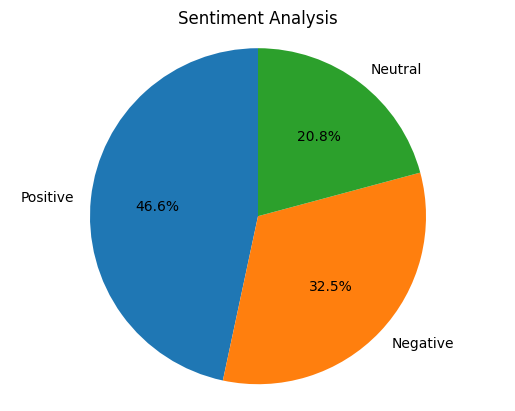

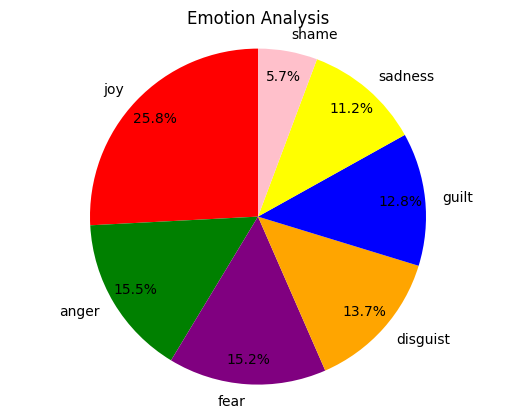

In [ ]:
#prediction using naive bayes and visualize
make_prediction(model1,predict_cv)
print(label_dict)
Sentiment_df,Emotion_df=calculate_count_percentage()
visualize_sentiment(Sentiment_df)
visualize_emotion(Emotion_df)

   emotion  count
0        0    828
1        1     86
2        4     39
3        2     18
4        3     12
5        6     11
6        5      5
sentiment
 0.000000    208
 0.500000     35
-0.400000     28
-0.500000     22
 1.000000     19
            ... 
 0.358333      1
-0.133333      1
-0.179464      1
-0.183333      1
 0.025000      1
Name: count, Length: 367, dtype: int64
                                                text  emotion  sentiment
0  bbc news - amazon boss jeff bezos rejects clai...        0    0.00000
1            pay word functions poorly chromebook? 🙄        0   -0.40000
2  csgo matchmaking full closet hacking, truly aw...        0   -0.35000
3  president slapping americans face really commi...        0    0.25000
4  hi i’ve madeleine mccann cellar past 13 years ...        0   -0.21875
{4: 'joy', 5: 'sadness', 0: 'anger', 2: 'fear', 6: 'shame', 1: 'disguist', 3: 'guilt'}


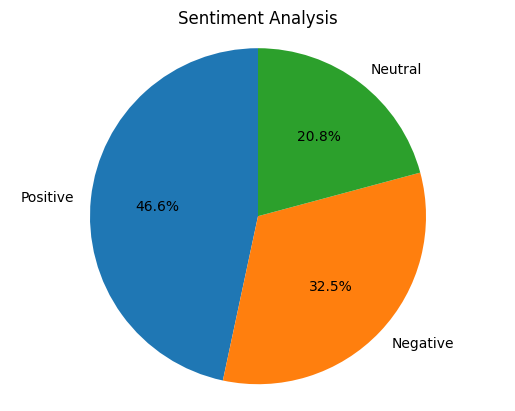

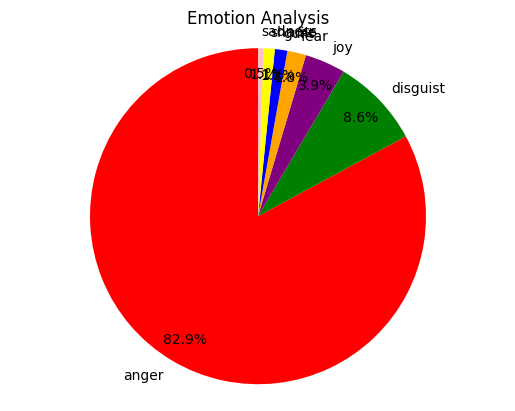

In [ ]:
#prediction for algo SVM and visualize
make_prediction(model3,predict_cv)
print(label_dict)
Sentiment_df,Emotion_df=calculate_count_percentage()
visualize_sentiment(Sentiment_df)
visualize_emotion(Emotion_df)

   emotion  count
0        0    243
1        4    233
2        5    133
3        1    129
4        3    123
5        2     81
6        6     57
sentiment
 0.000000    208
 0.500000     35
-0.400000     28
-0.500000     22
 1.000000     19
            ... 
 0.358333      1
-0.133333      1
-0.179464      1
-0.183333      1
 0.025000      1
Name: count, Length: 367, dtype: int64
                                                text  emotion  sentiment
0  bbc news - amazon boss jeff bezos rejects clai...        5    0.00000
1            pay word functions poorly chromebook? 🙄        6   -0.40000
2  csgo matchmaking full closet hacking, truly aw...        1   -0.35000
3  president slapping americans face really commi...        6    0.25000
4  hi i’ve madeleine mccann cellar past 13 years ...        3   -0.21875
{4: 'joy', 5: 'sadness', 0: 'anger', 2: 'fear', 6: 'shame', 1: 'disguist', 3: 'guilt'}


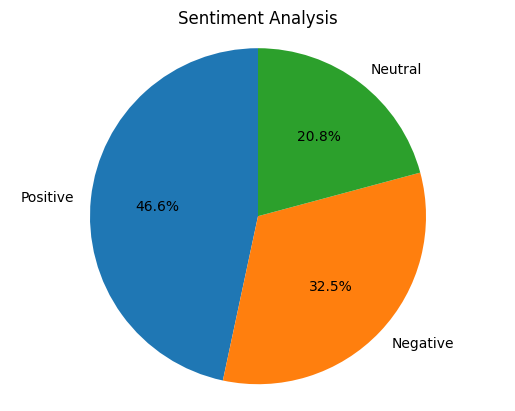

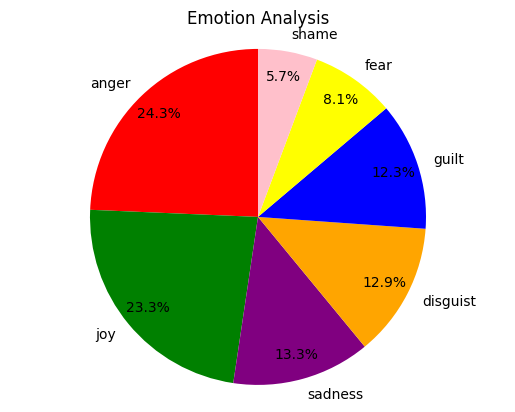

In [ ]:
#prediction for algo RF and visualze
make_prediction(model5,predict_cv)
print(label_dict)
Sentiment_df,Emotion_df=calculate_count_percentage()
visualize_sentiment(Sentiment_df)
visualize_emotion(Emotion_df)

   emotion  count
0        4    233
1        1    189
2        0    162
3        2    146
4        3    123
5        5     95
6        6     51
sentiment
 0.000000    208
 0.500000     35
-0.400000     28
-0.500000     22
 1.000000     19
            ... 
 0.358333      1
-0.133333      1
-0.179464      1
-0.183333      1
 0.025000      1
Name: count, Length: 367, dtype: int64
                                                text  emotion  sentiment
0  bbc news - amazon boss jeff bezos rejects clai...        5    0.00000
1            pay word functions poorly chromebook? 🙄        0   -0.40000
2  csgo matchmaking full closet hacking, truly aw...        4   -0.35000
3  president slapping americans face really commi...        1    0.25000
4  hi i’ve madeleine mccann cellar past 13 years ...        3   -0.21875
{4: 'joy', 5: 'sadness', 0: 'anger', 2: 'fear', 6: 'shame', 1: 'disguist', 3: 'guilt'}


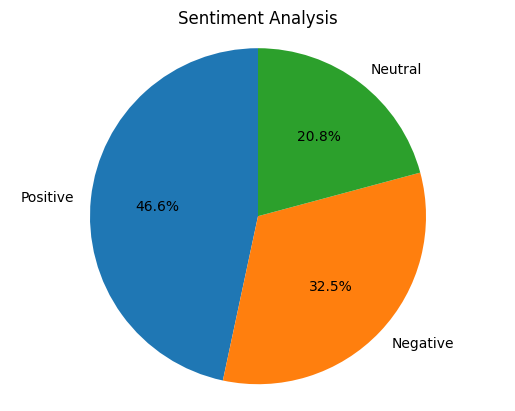

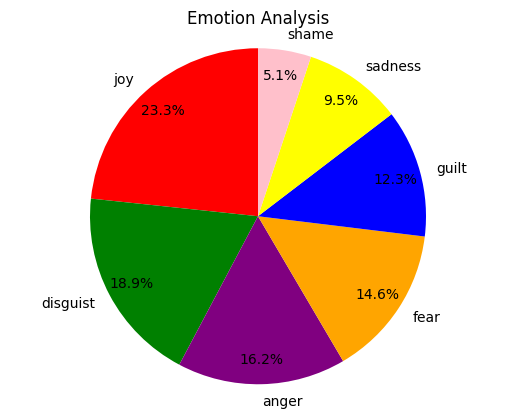

In [ ]:
#prediction for algo LR and visualize
make_prediction(model7,predict_cv)
print(label_dict)
Sentiment_df,Emotion_df=calculate_count_percentage()
visualize_sentiment(Sentiment_df)
visualize_emotion(Emotion_df)